In [38]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import pandas
import torch
import torch.nn as nn

In [75]:
X = [0.05, 0.1, 0.2, 0.5, 1, 2]
Archs = ['Rand', 'Mag', 'SNIP', 'GraSP', 'SynFlow']
Colors = {
    'Rand': 'r',
    'Mag': 'b',
    'SNIP': 'g',
    'GraSP': 'y',
    'SynFlow': 'purple'
}

Accuracies = {
    'Rand': [87.96, 87.69, 88.09, 86.82, 10.00, 10.00],
    'Mag': [87.66, 88.38, 87.53, 88.58, 87.64, 10.00],
    'SNIP': [87.79, 87.99, 88.00, 87.87, 86.71, 81.50],
    'GraSP': [51.74, 44.51, 47.54, 27.07, 35.79, 59.41],
    'SynFlow': [87.63, 88.04, 88.19, 87.51, 88.55, 10.0]
}

InferenceTimes = {
    'Rand': [1.81, 1.8038, 1.849, 1.91, 1.902, 1.973],
    'Mag': [2.08, 2.086, 2.065, 2.13, 1.986, 2.117],
    'SNIP': [2.093, 2.093, 2.11, 2.087, 2.097, 2.03],
    'GraSP': [2.26, 1.91, 1.81, 1.999, 1.92, 1.98],
    'SynFlow': [1.85, 1.957, 1.869, 1.901, 1.874, 2.04]
}

FLOPS = {
    'Rand': [0.8916, 0.7945, 0.6311, 0.3165, 0.1009, 0.0103],
    'Mag': [0.9184, 0.8451, 0.7204, 0.4638, 0.2452, 0.0781],
    'SNIP': [0.9768, 0.9267, 0.7812, 0.4622, 0.1980, 0.0411],
    'GraSP': [0.8201, 0.7294, 0.571, 0.3780, 0.1752, 0.0587],
    'SynFlow': [0.9488, 0.9026, 0.8217, 0.6424, 0.4572, 0.1845]
}

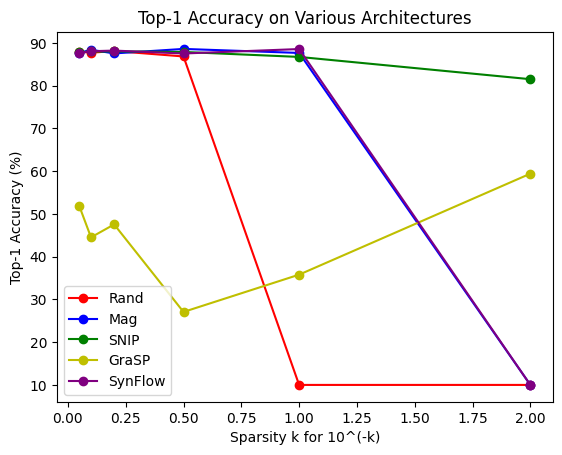

In [76]:
for arch in Archs:
    plt.plot(X, Accuracies[arch], '-o', color=Colors[arch], label=arch)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Sparsity k for 10^(-k)")
plt.ylabel("Top-1 Accuracy (%)")
plt.title("Top-1 Accuracy on Various Architectures")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

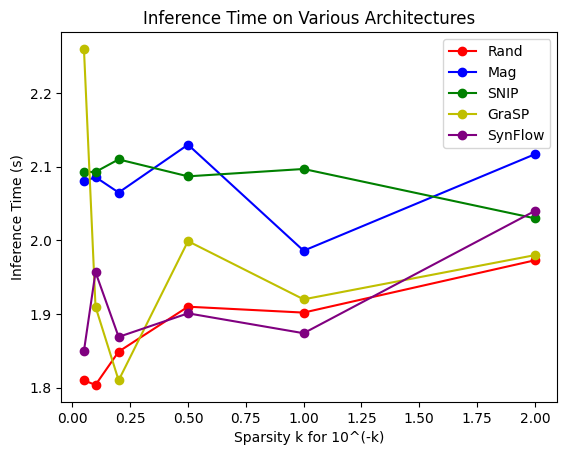

In [77]:
for arch in Archs:
    plt.plot(X, InferenceTimes[arch], '-o', color=Colors[arch], label=arch)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Sparsity k for 10^(-k)")
plt.ylabel("Inference Time (s)")
plt.title("Inference Time on Various Architectures")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

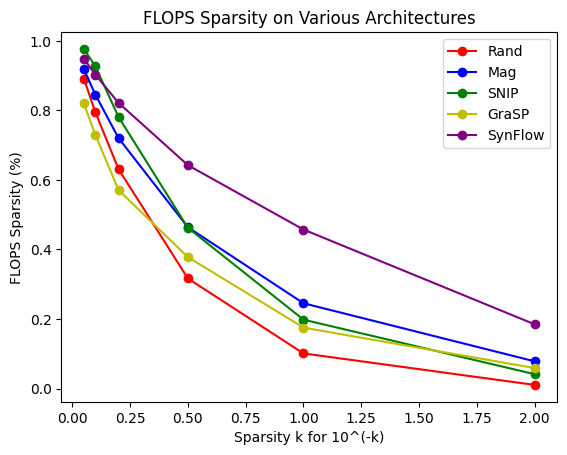

In [78]:
for arch in Archs:
    plt.plot(X, FLOPS[arch], '-o', color=Colors[arch], label=arch)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Sparsity k for 10^(-k)")
plt.ylabel("FLOPS Sparsity (%)")
plt.title("FLOPS Sparsity on Various Architectures")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [30]:
Layers = {}

path = 'Results/Data/HYP_cifar10_vgg16_mag_0.5/compression.pkl'
Layers['Mag'] = pandas.read_pickle(path)

path = 'Results/Data/HYP_cifar10_vgg16_grasp_0.5/compression.pkl'
Layers['GraSP'] = pandas.read_pickle(path)

path = 'Results/Data/HYP_cifar10_vgg16_synflow_0.5/compression.pkl'
Layers['SynFlow'] = pandas.read_pickle(path)

path = 'Results/Data/HYP_cifar10_vgg16_rand_0.5/compression.pkl'
Layers['Rand'] = pandas.read_pickle(path)

path = 'Results/Data/HYP_cifar10_vgg16_snip_0.5/compression.pkl'
Layers['SNIP'] = pandas.read_pickle(path)

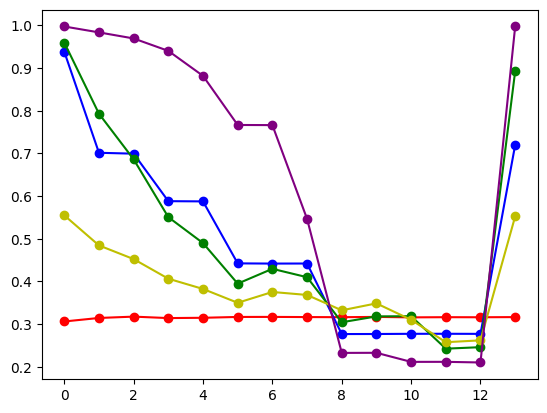

In [100]:
PRUNABLE_LAYERS = 14
LayerFlops = {
    'Mag': [],
    'Rand': [],
    'GraSP': [],
    'SNIP': [],
    'SynFlow': [],
}

for i in range(PRUNABLE_LAYERS):
    for arch in Archs:
        LayerFlops[arch].append(Layers[arch].iloc[2 * i]['sparsity'])

X = np.arange(0, PRUNABLE_LAYERS)

for arch in Archs:
    plt.plot(X, LayerFlops[arch], '-o', color=Colors[arch], label=arch)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Prunable Layer #")
plt.ylabel("FLOPS Sparsity %")
plt.title("FLOPS Sparsity per Layer (conv0 - conv1)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()


In [54]:
Model = {}

path = 'Results/Data/HYP_cifar10_vgg16_mag_0.5/model.pt'
Model['Mag'] = torch.load(path, map_location=torch.device('cpu'))

path = 'Results/Data/HYP_cifar10_vgg16_grasp_0.5/model.pt'
Model['GraSP'] = torch.load(path, map_location=torch.device('cpu'))

path = 'Results/Data/HYP_cifar10_vgg16_rand_0.5/model.pt'
Model['Rand'] = torch.load(path, map_location=torch.device('cpu'))

path = 'Results/Data/HYP_cifar10_vgg16_snip_0.5/model.pt'
Model['SNIP'] = torch.load(path, map_location=torch.device('cpu'))

path = 'Results/Data/HYP_cifar10_vgg16_synflow_0.5/model.pt'
Model['SynFlow'] = torch.load(path, map_location=torch.device('cpu'))

print(Model['Mag'].keys())

odict_keys(['layers.0.conv.weight', 'layers.0.conv.bias', 'layers.0.conv.weight_mask', 'layers.0.conv.bias_mask', 'layers.1.conv.weight', 'layers.1.conv.bias', 'layers.1.conv.weight_mask', 'layers.1.conv.bias_mask', 'layers.3.conv.weight', 'layers.3.conv.bias', 'layers.3.conv.weight_mask', 'layers.3.conv.bias_mask', 'layers.4.conv.weight', 'layers.4.conv.bias', 'layers.4.conv.weight_mask', 'layers.4.conv.bias_mask', 'layers.6.conv.weight', 'layers.6.conv.bias', 'layers.6.conv.weight_mask', 'layers.6.conv.bias_mask', 'layers.7.conv.weight', 'layers.7.conv.bias', 'layers.7.conv.weight_mask', 'layers.7.conv.bias_mask', 'layers.8.conv.weight', 'layers.8.conv.bias', 'layers.8.conv.weight_mask', 'layers.8.conv.bias_mask', 'layers.10.conv.weight', 'layers.10.conv.bias', 'layers.10.conv.weight_mask', 'layers.10.conv.bias_mask', 'layers.11.conv.weight', 'layers.11.conv.bias', 'layers.11.conv.weight_mask', 'layers.11.conv.bias_mask', 'layers.12.conv.weight', 'layers.12.conv.bias', 'layers.12.con

In [79]:
def plot(model_dict, name):
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(20)

    bins = np.linspace(-1.5,1.5,50)

    i = 0
    for layer in Model[name]:
        if 'weight' in layer and 'mask' not in layer:
            a = model_dict[name][layer].flatten().numpy()
            
            ax = fig.add_subplot(4,4,i+1)
            
            ax.set_title(name + ': ' + layer)
            ax.hist(a, bins=bins, color=Colors[name])
            i += 1

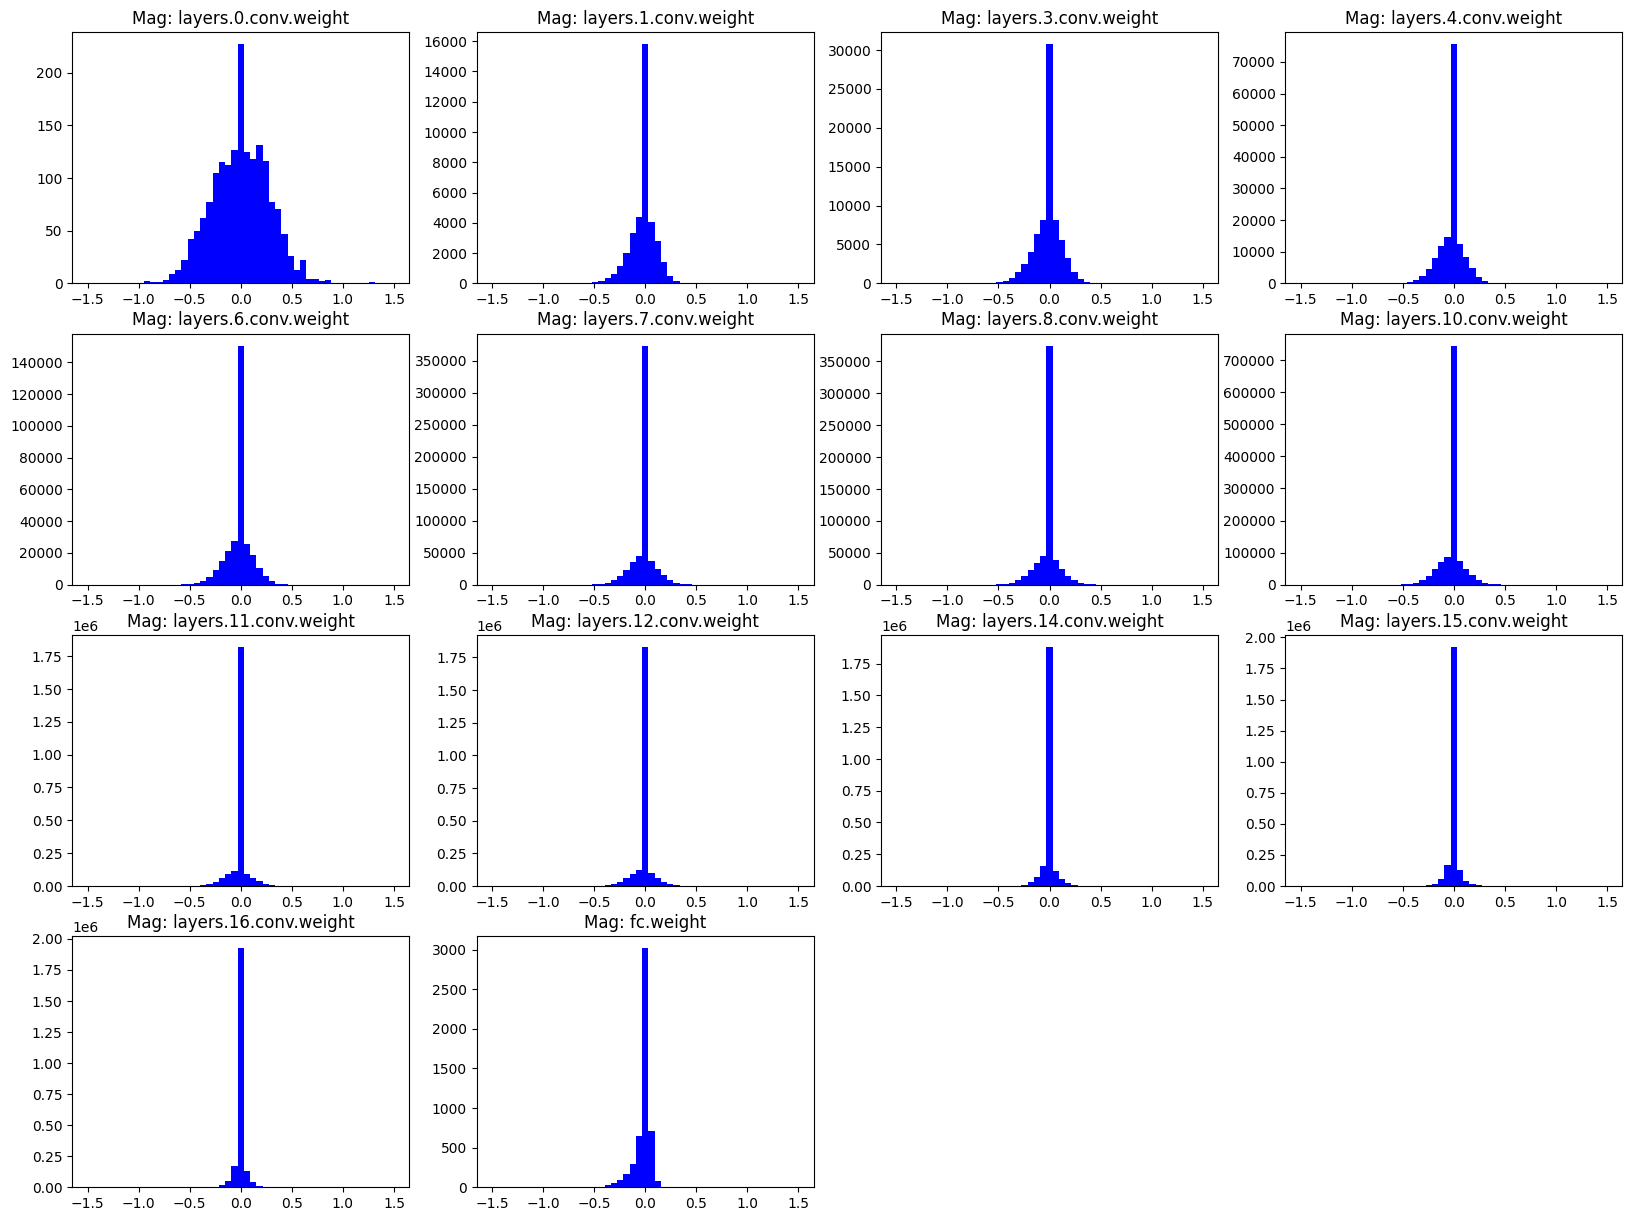

In [80]:
plot(Model, 'Mag')

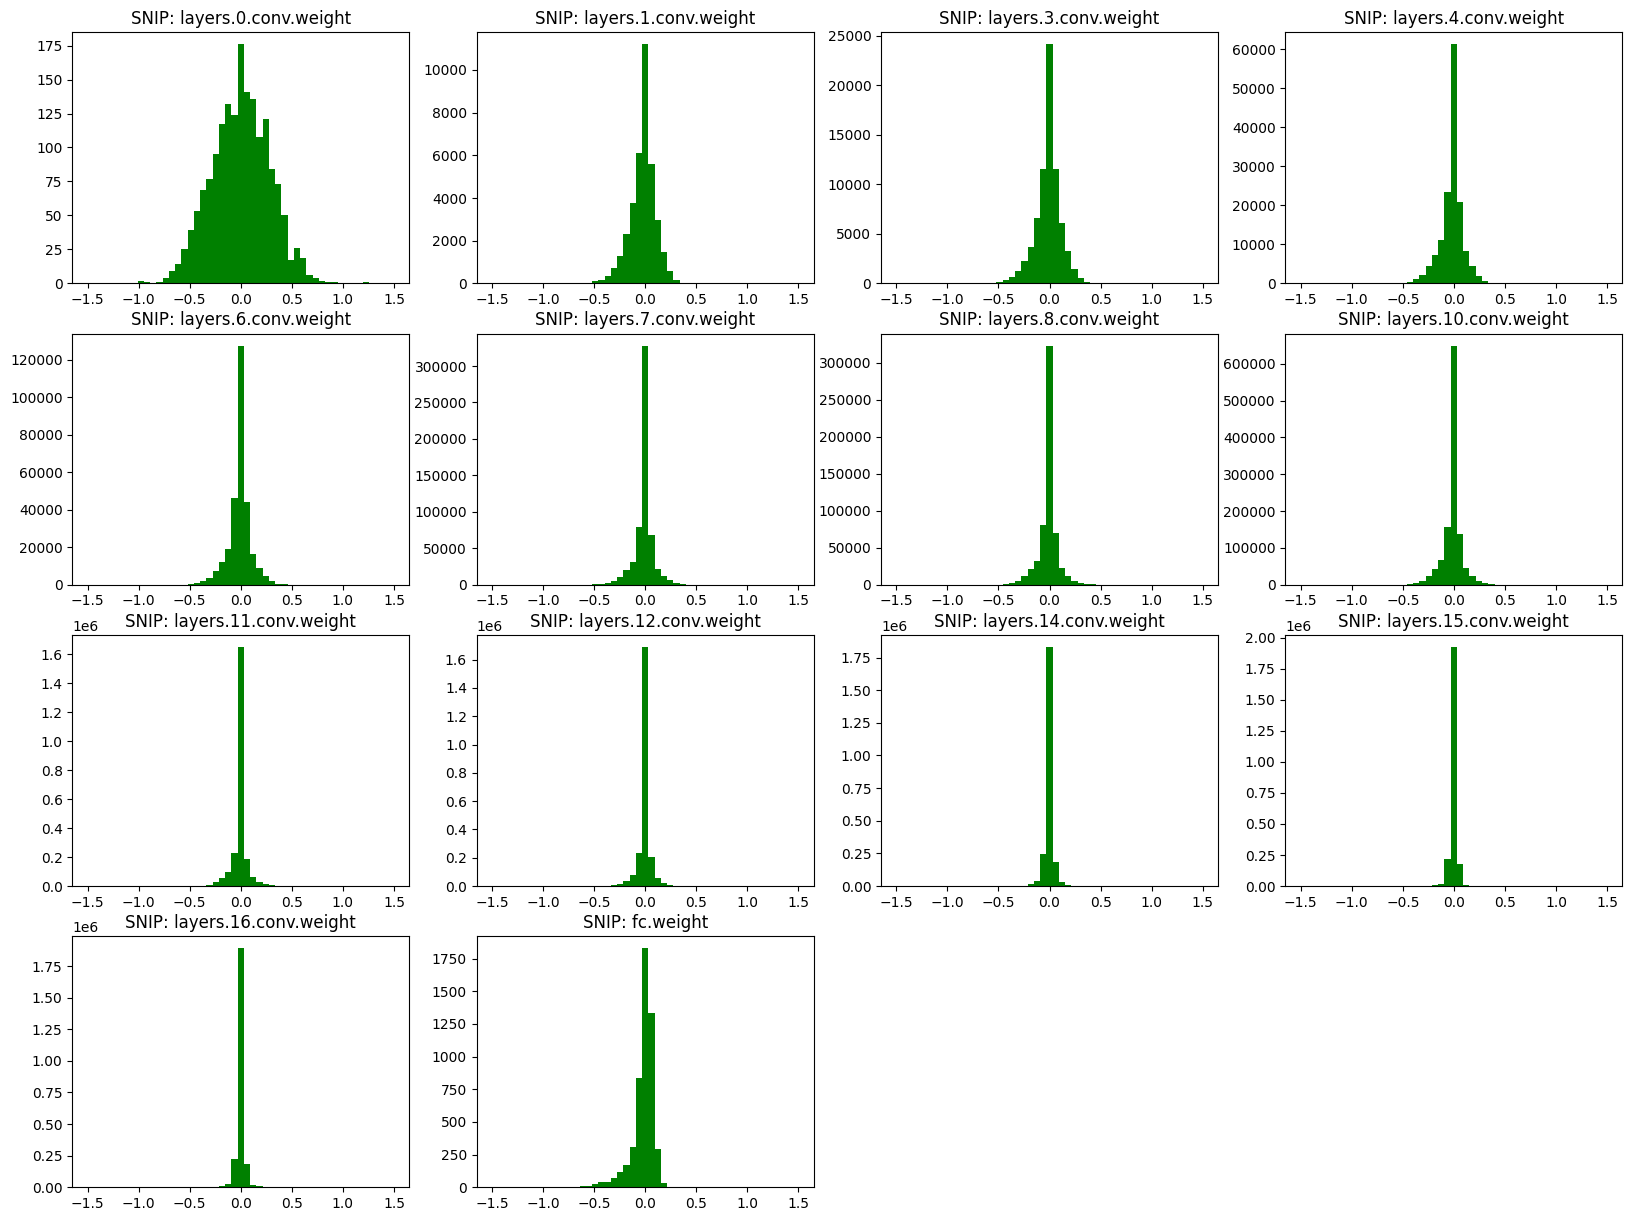

In [82]:
plot(Model, 'SNIP')

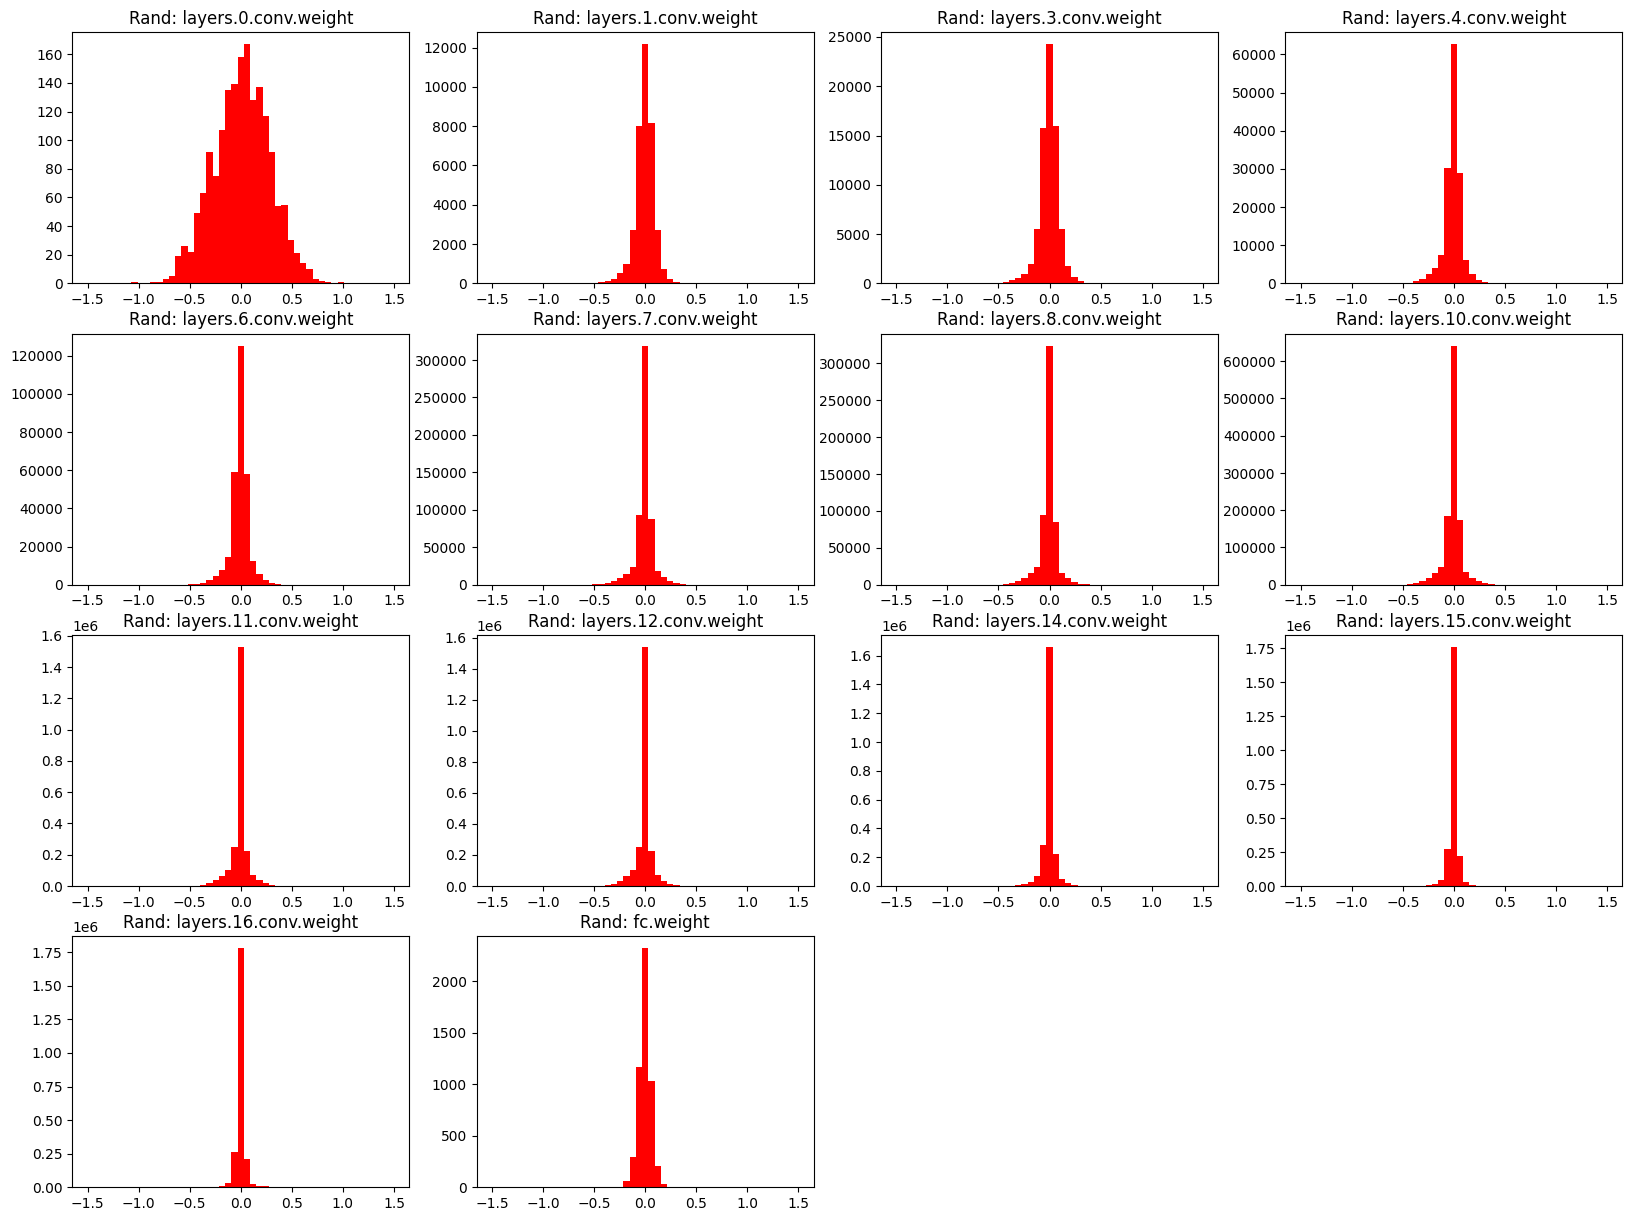

In [81]:
plot(Model, 'Rand')

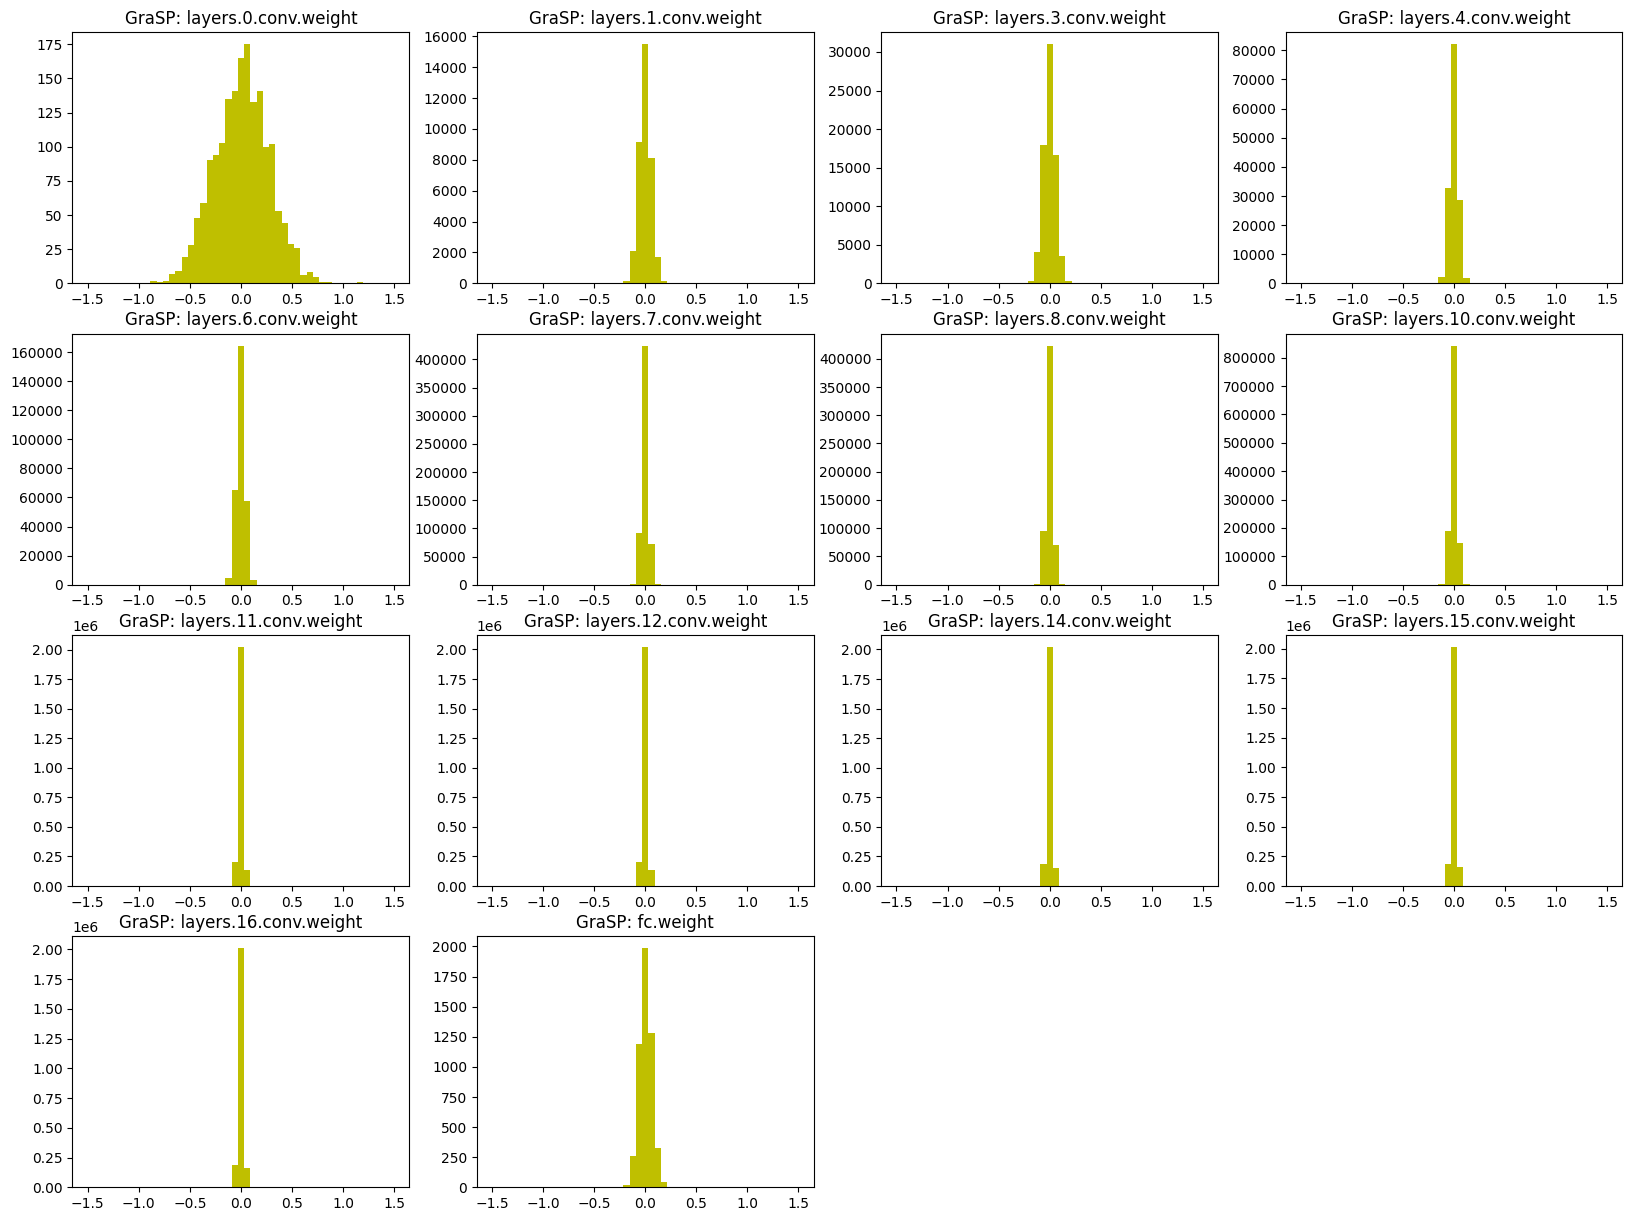

In [83]:
plot(Model, 'GraSP')

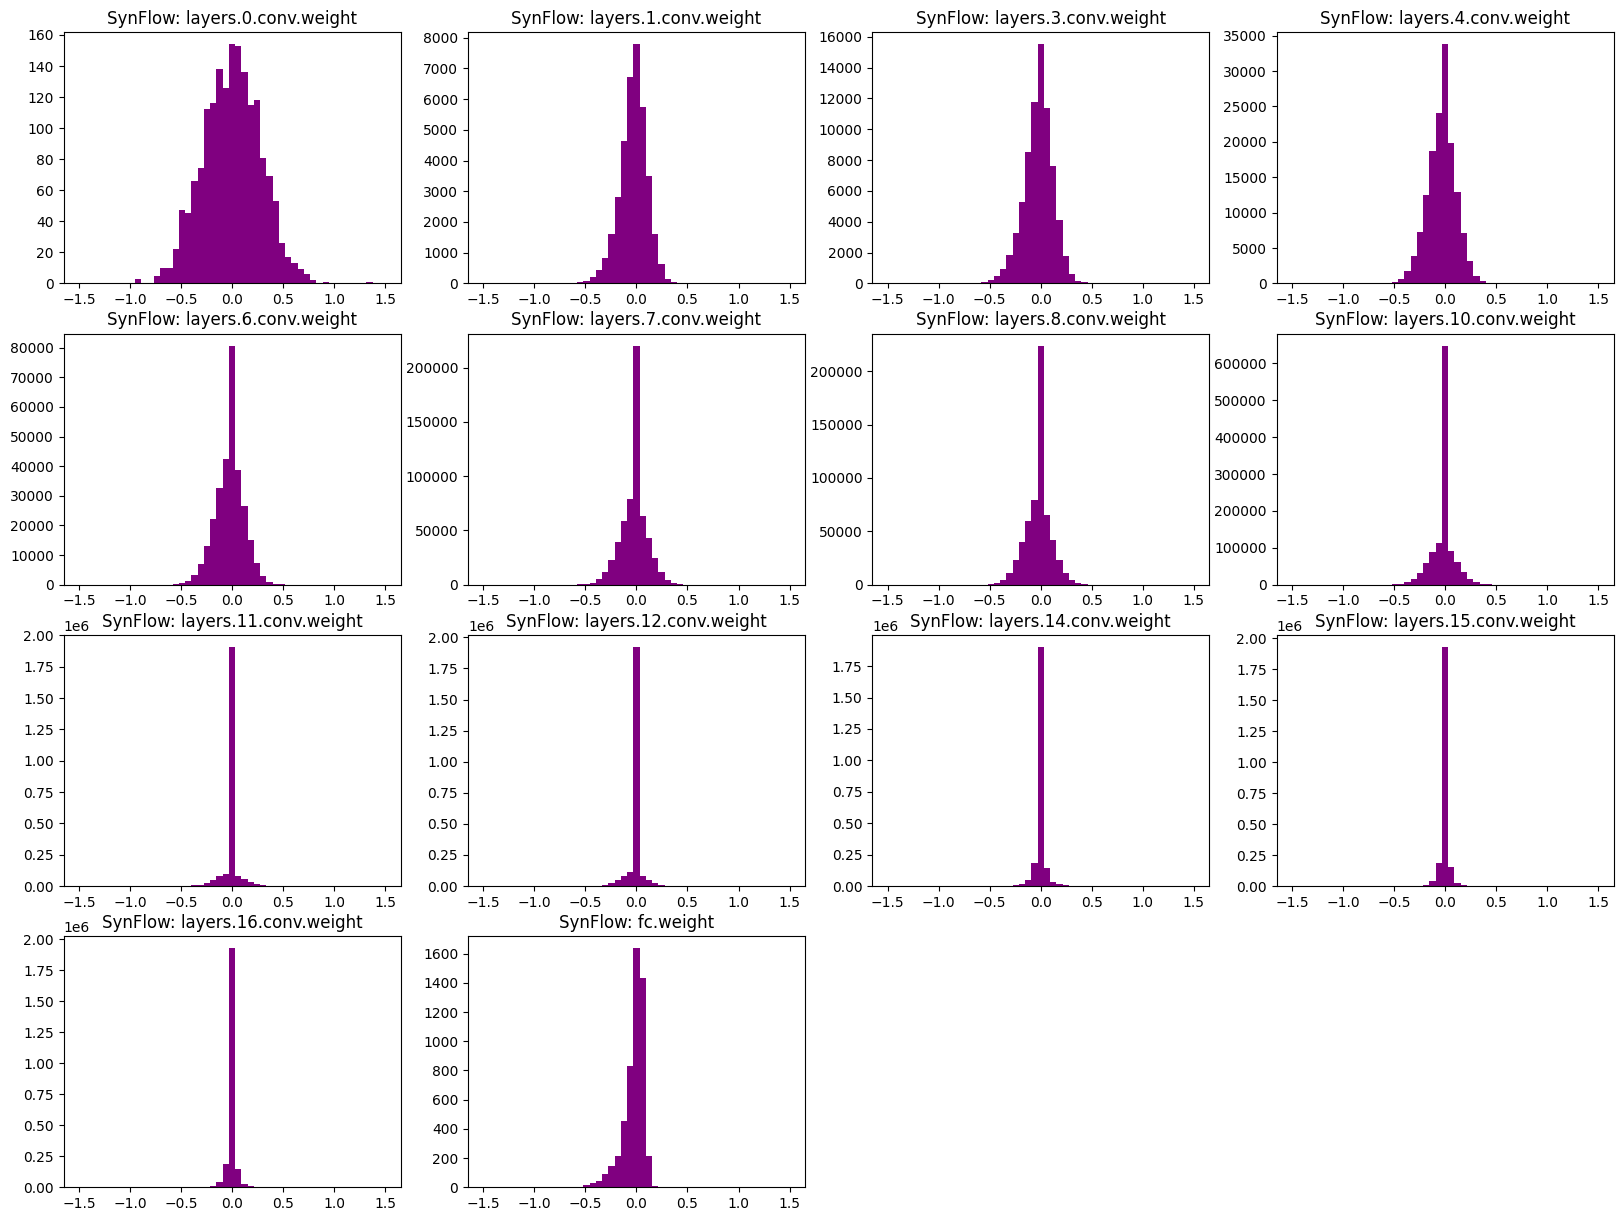

In [84]:
plot(Model, 'SynFlow')